Тут мы пробуем спиздить данные с avto.ru и как-то их проанализировать.
Нас интересуют данные по машинам Honda CR-V, III поколение, коробка автомат, по всем регионам.

In [3]:
from datetime import datetime
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.dates import HourLocator, DayLocator, MonthLocator, YearLocator, DateFormatter
from matplotlib.pylab import rcParams
import numpy as np
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly

import plotly.graph_objs as go
import seaborn as sb
import folium
import json
import warnings                    # убираем ошибки из output 
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)
rcParams['figure.figsize'] = 15,6


In [6]:
number_of_files = len(os.listdir('/home/ivan/WORK/PYTHON/studying/scrapy_spiders/avtoru/responses/honda_cr-v'))

In [7]:
offers = []
for i in range(1, number_of_files + 1):
    with open(f'/home/ivan/WORK/PYTHON/studying/scrapy_spiders/avtoru/responses/honda_cr-v/response_page_{i}.json') as f:
        d = json.load(f)['offers']
        offers.extend(d)
df = pd.DataFrame(offers)
df.set_index(pd.Index(range(df.shape[0])))
# df.drop(df[df.documents == {}].index, axis=0, inplace=True)
# df['owners_number'] = df.documents.apply(lambda x: x['owners_number'])
df['pts_original'] = df.documents.apply(lambda x: x['pts'])
df['custom_cleared'] = df.documents.apply(lambda x: x['custom_cleared'])
df['year'] = df.documents.apply(lambda x: x['year'])
# df['tax_by_year'] = df.owner_expenses.apply(lambda x: json.load(x)['transport_tax'])
# df['tax_by_year'] = df.owner_expenses.apply(lambda x: x['transport_tax']['tax_by_year'])
df['horse_power'] = df.vehicle_info.apply(lambda x: x['tech_param']['power'])
df['seller_coords'] = df.seller.apply(lambda x: (x['location']['coord']['latitude'], 
                                                 x['location']['coord']['longitude']))
df.drop(df[df.price_info == {}].index, axis=0, inplace=True)
df['price'] = df.price_info.apply(lambda x: x['price'])
df['state_mileage'] = df.state.apply(lambda x: x['mileage'])
df['state_not_beaten'] = df.state.apply(lambda x: x['state_not_beaten'])
useless_columns = ['is_favorite', 'old_category_id', 'category', 'delivery_info', 'tags', 
                   'counters', 'grouping_info', 'hash', 'id', 'recall_info', 'saleId', 'sub_category',
                   'multiposting', 'discount_price', 'dealer_credit_config', 'soldMinutes',
                   'discount_options', 'section', 'services', 'shark_info', 'additional_info', 'price_info',
                   'owner_expenses', 'price_history', 'salon', 'seller', 'badges', 'service_prices']
for column in useless_columns:
    try:
        df.drop(column, axis=1, inplace=True)
    except KeyError:
        continue
df.head()

,availability,color_hex,description,documents,seller_type,status,state,vehicle_info,lk_summary,pts_original,custom_cleared,year,horse_power,seller_coords,price,state_mileage,state_not_beaten
0,IN_STOCK,200204,Один собственник. Без ДТП. \nСамая полная комп...,"{'owners_number': 1, 'pts_original': True, 'cu...",PRIVATE,ACTIVE,"{'mileage': 120000, 'state_not_beaten': True, ...","{'configuration': {'id': '2306831', 'body_type...","2.4 AT (170 л.с.), внедорожник, полный, бензин",ORIGINAL,True,2008,170,"(59.722462, 30.416946)",955000,120000,True
1,IN_STOCK,97948F,В отличном состоянии. Машина местная Красноярс...,"{'owners_number': 2, 'pts_original': True, 'cu...",PRIVATE,ACTIVE,"{'mileage': 158000, 'state_not_beaten': True, ...","{'configuration': {'id': '2306831', 'body_type...","2.0 AT (150 л.с.), внедорожник, полный, бензин",ORIGINAL,True,2008,150,"(56.010563, 92.85257)",855000,158000,True
2,IN_STOCK,040001,⚡⚡⚡ ВЫ МОЖЕТЕ ПОЛУЧИТЬ СКИДКУ НА ДАННЫЙ АВТОМО...,"{'owners_number': 2, 'pts_original': True, 'cu...",COMMERCIAL,ACTIVE,"{'mileage': 190002, 'state_not_beaten': True, ...","{'configuration': {'id': '2306831', 'body_type...","2.4 AT (166 л.с.), внедорожник, полный, бензин",ORIGINAL,True,2008,166,"(54.64756, 39.654179)",840000,190002,True
3,IN_STOCK,CACECB,"● АВТОКРЕДИТ от 2,9%\n● Первоначальный взнос о...","{'owners_number': 1, 'pts_original': True, 'cu...",COMMERCIAL,ACTIVE,"{'mileage': 137000, 'state_not_beaten': True, ...","{'configuration': {'id': '2306831', 'body_type...","2.4 AT (166 л.с.), внедорожник, полный, бензин",ORIGINAL,True,2008,166,"(55.851013, 37.580589)",890000,137000,True
4,IN_STOCK,040001,КРЕДИТ ЗА 1 ЧАС\n БЕЗ ПЕРВОНАЧАЛЬНОГО ВЗНОСА\n...,"{'owners_number': 1, 'pts_original': True, 'cu...",COMMERCIAL,ACTIVE,"{'mileage': 190000, 'state_not_beaten': True, ...","{'configuration': {'id': '2306831', 'body_type...","2.0 AT (150 л.с.), внедорожник, полный, бензин",ORIGINAL,True,2007,150,"(55.04398, 82.935585)",850000,190000,True


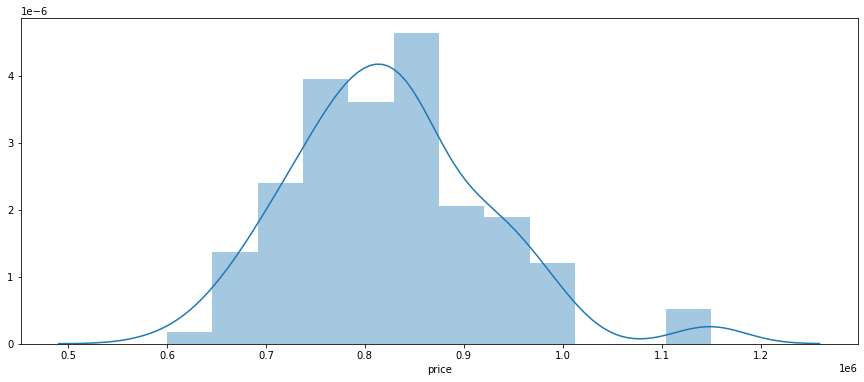

In [8]:
sb.distplot(df.price)

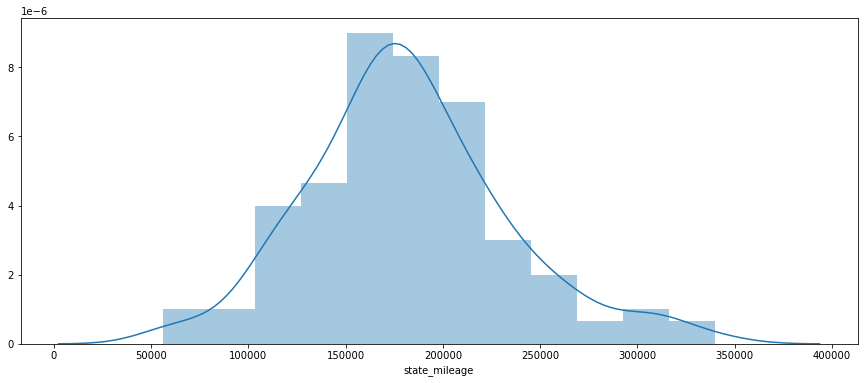

In [9]:
sb.distplot(df.state_mileage)

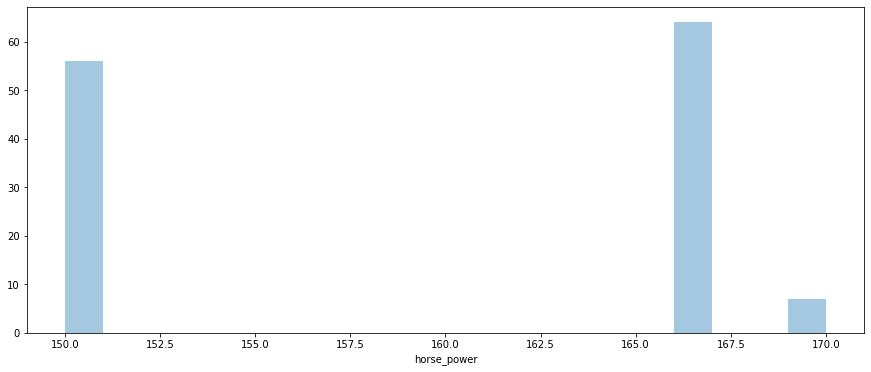

In [10]:
sb.distplot(df.horse_power, kde=False, bins=20)

In [11]:
m = folium.Map(location=[70.5236, 105.6750],
               zoom_start=3)

for i in df.index:
    folium.Circle( (df.seller_coords[i][0], df.seller_coords[i][1]), 
                  radius=70,
                  tooltip=df.price[i],
                  opacity=1,
                  fill=True,
                  
                  color=f'#{df.color_hex[i]}').add_to(m)
m

In [12]:
df.shape

(127, 17)